In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from jacobi import propagate
from matplotlib.cm import get_cmap
plt.rcParams.update({'font.size': 16, 'lines.markersize': 8})
cmap = get_cmap('tab10').colors

In [2]:
camera_res = (1024,1280)
# Load images into array of size (1024,1280), subtract dark frame
dark = np.array(Image.open('3.2/3.2.1/Dark_Frame.bmp')).reshape(camera_res)
pos_0 = np.array(Image.open('3.2/3.2.1/Pos_0cm.bmp')).reshape(camera_res) 
pos_5 = np.array(Image.open('3.2/3.2.1/Pos_5cm.bmp')).reshape(camera_res) 
pos_10 = np.array(Image.open('3.2/3.2.1/Pos_10cm.bmp')).reshape(camera_res) 
pos_15 = np.array(Image.open('3.2/3.2.1/Pos_15cm.bmp')).reshape(camera_res) 
pos_20 = np.array(Image.open('3.2/3.2.1/Pos_20cm.bmp')).reshape(camera_res) 

In [3]:
# xy coords in shape tuple(ndarray(1024,1280), ndarray(1024,1280)) -> format used by gauss()
xy_tuple = np.meshgrid(np.arange(0,1280), np.arange(0,1024))
#2D Gaussian fit function with sigma_x=sigma_y==sigma, return is flattened for curve_fit
def gauss(xy_tuple, a, mu_x, mu_y, sigma):
    x,y = xy_tuple
    f = a * np.exp(-(x-mu_x)**2/(2*sigma**2) - (y-mu_y)**2/(2*sigma**2))
    return f.ravel()

def pixel_to_meter(size_in_pixels):
    '''Converts a size in pixels to a size in mm using the pixel size of the camera.'''
    return size_in_pixels * 5.3e-3

def get_beam_parameters_in_pixels(width, error_on_width):
    ''' Returns tuple of( beam radius, error on beam radius) in pixels from the width sigma and its error of the gaussian fit '''
    r = np.sqrt(-2*width**2*np.log(1/(np.e**2)))
    sigma_r = - (4*width*np.log(1/(np.e**2))) / (2*r) * error_on_width
    return (r, sigma_r)


### 0cm

In [4]:
data = pos_0.ravel() # Image needs to be flattened for curve_fit
inital_guess = (140, 500, 400, 100)
popt, pcov = curve_fit(gauss, xy_tuple, data, p0=inital_guess, bounds=([100,0,0,0],[255,1200,1000, 400]))
gauss_fit_vals = gauss(xy_tuple, *popt).reshape(camera_res)
# Analytical value of radius of the beam
radius, error_on_radius = get_beam_parameters_in_pixels(popt[-1], np.sqrt(np.diag(pcov)[-1]))
#error_on_radius = np.sqrt(np.diag(pcov)[-1])
print(f'Radius of the beam: {pixel_to_meter(radius):.5f} +/- {pixel_to_meter(error_on_radius):.5f} mm')
r_0 = pixel_to_meter(radius)
sigma_r_0 = pixel_to_meter(error_on_radius)

Radius of the beam: 1.06477 +/- 0.00028 mm


### 5cm

In [5]:
data = pos_5.ravel() # Image needs to be flattened for curve_fit
inital_guess = (140, 650, 370, 100)
popt, pcov = curve_fit(gauss, xy_tuple, data, p0=inital_guess, bounds=([100,0,0,0],[255,1200,1000, 400]))
gauss_fit_vals = gauss(xy_tuple, *popt).reshape(camera_res)
# Analytical value of radius of the beam
radius, error_on_radius = get_beam_parameters_in_pixels(popt[-1], np.sqrt(np.diag(pcov)[-1]))
#error_on_radius = np.sqrt(np.diag(pcov)[-1])
print(f'Radius of the beam: {pixel_to_meter(radius):.5f} +/- {pixel_to_meter(error_on_radius):.5f} mm')
r_5 = pixel_to_meter(radius)
sigma_r_5 = pixel_to_meter(error_on_radius)

Radius of the beam: 1.02696 +/- 0.00022 mm


### 10cm

In [6]:
data = pos_10.ravel() # Image needs to be flattened for curve_fit
inital_guess = (140, 800, 400, 100)
popt, pcov = curve_fit(gauss, xy_tuple, data, p0=inital_guess, bounds=([100,0,0,0],[255,1200,1000, 400]))
gauss_fit_vals = gauss(xy_tuple, *popt).reshape(camera_res)
# Analytical value of radius of the beam
radius, error_on_radius = get_beam_parameters_in_pixels(popt[-1], np.sqrt(np.diag(pcov)[-1]))
#error_on_radius = np.sqrt(np.diag(pcov)[-1])
print(f'Radius of the beam: {pixel_to_meter(radius):.5f} +/- {pixel_to_meter(error_on_radius):.5f} mm')
r_10 = pixel_to_meter(radius)
sigma_r_10 = pixel_to_meter(error_on_radius)

Radius of the beam: 1.01203 +/- 0.00018 mm


### 15cm

In [7]:
data = pos_15.ravel() # Image needs to be flattened for curve_fit
inital_guess = (140, 800, 400, 100)
popt, pcov = curve_fit(gauss, xy_tuple, data, p0=inital_guess, bounds=([100,0,0,0],[255,1200,1000, 400]))
gauss_fit_vals = gauss(xy_tuple, *popt).reshape(camera_res)
# Analytical value of radius of the beam
radius, error_on_radius = get_beam_parameters_in_pixels(popt[-1], np.sqrt(np.diag(pcov)[-1]))
#error_on_radius = np.sqrt(np.diag(pcov)[-1])
print(f'Radius of the beam: {pixel_to_meter(radius):.5f} +/- {pixel_to_meter(error_on_radius):.5f} mm')
r_15 = pixel_to_meter(radius)
sigma_r_15 = pixel_to_meter(error_on_radius)

Radius of the beam: 1.01332 +/- 0.00016 mm


### 20cm

In [21]:
data = pos_20.ravel() # Image needs to be flattened for curve_fit
inital_guess = (140, 800, 400, 100)
popt, pcov = curve_fit(gauss, xy_tuple, data, p0=inital_guess, bounds=([100,0,0,0],[255,1200,1000, 400]))
gauss_fit_vals = gauss(xy_tuple, *popt).reshape(camera_res)
# Analytical value of radius of the beam
radius, error_on_radius = get_beam_parameters_in_pixels(popt[-1], np.sqrt(np.diag(pcov)[-1]))
#error_on_radius = np.sqrt(np.diag(pcov)[-1])
print(f'Radius of the beam: {pixel_to_meter(radius):.5f} +/- {pixel_to_meter(error_on_radius):.5f} mm')
r_20 = pixel_to_meter(radius)
sigma_r_20 = pixel_to_meter(error_on_radius)

Radius of the beam: 1.02989 +/- 0.00017 mm


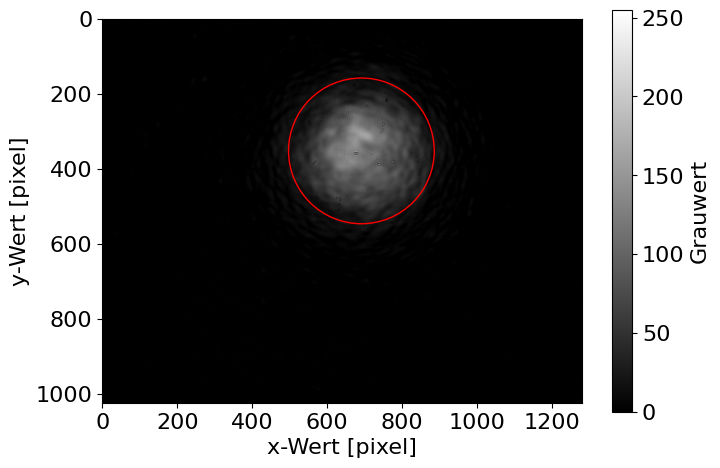

In [26]:
# Plot test image
fig, ax = plt.subplots( figsize=(7.5,5))
im = ax.imshow(data.reshape(camera_res), cmap='gray', vmin=0, vmax=255)
cbar = fig.colorbar(im)
circle = plt.Circle((popt[1], popt[2]), radius, color='r', fill=False)
ax.add_patch(circle)
ax.set_xlabel('x-Wert [pixel]')
ax.set_ylabel( 'y-Wert [pixel]')
cbar.set_label('Grauwert', fontsize=16)
fig.tight_layout()
fig.savefig('Plots/example_gauss_fit.png', dpi=600, transparent=True, pad_inches=0.1)

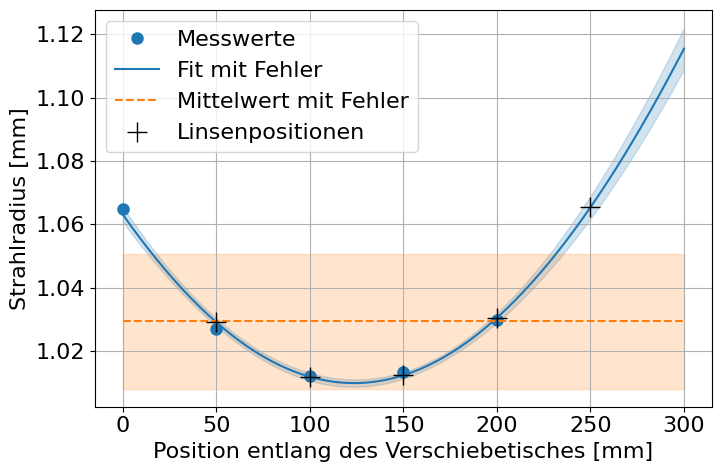

In [10]:
d = np.array([0, 50, 100, 150, 200]) # Positions where photos have been taken [mm]
r_arr = np.array([r_0, r_5, r_10, r_15, r_20]) # Corresponding beam radii [mm]
sigma_r_arr = np.array([sigma_r_0, sigma_r_5, sigma_r_10, sigma_r_15, sigma_r_20]) # Corresponding errors on beam radii [mm]
lens_pos = - np.array([100, 150, 200, 250, 300]) + 350  # Lens positions [mm]

r_mean = np.mean(r_arr)
r_std = np.std(r_arr, ddof=1) # Sample standard deviation, Stichprobenvarianz
d_plot= np.linspace(0,300, 200)

def radius(z, w0, z0, zR):
    ''' Therory function for the radius of the beam '''
    return w0 * np.sqrt(1 + ((z-z0)/zR)**2)
popt, pcov = curve_fit(radius, d, r_arr, p0=[1.05, 100, 100], bounds=([0.8,75, 0],[1.06, 140, np.inf]), sigma=sigma_r_arr)
# Do linear error propagation - w is radius(d_plot) and wcov is the error of each w
w, wcov = propagate(lambda par_vec: radius(d_plot, *par_vec), popt, pcov)
wcov = np.sqrt(np.diag(wcov))

fig, ax = plt.subplots(figsize=(7.5,5))
ax.plot(d, r_arr, 'o', color=cmap[0], label='Messwerte')
# Fit
ax.plot(d_plot, w, color=cmap[0], label='Fit mit Fehler')
ax.fill_between(d_plot, w+wcov, w-wcov, color=cmap[0], alpha=0.2)
# Mean
ax.plot(d_plot, r_mean*np.ones_like(d_plot), '--', color=cmap[1], label='Mittelwert mit Fehler')
ax.fill_between(d_plot, r_mean-r_std, r_mean+r_std, color=cmap[1], alpha=0.2)
ax.plot(lens_pos, radius(lens_pos, *popt), '+k', label='Linsenpositionen', markersize=15)
ax.legend()
ax.grid()
ax.set_xlabel('Position entlang des Verschiebetisches [mm]')
ax.set_ylabel('Strahlradius [mm]')
fig.tight_layout()
fig.savefig('Plots/beam_radius.pdf')

In [11]:

wp, wcovp = propagate(lambda par_vec: radius([50,100,150,200,250], *par_vec), popt, pcov)
wcovp = np.sqrt(np.diag(wcovp))
f = np.array([300, 250, 200, 150, 100])

focal_width = (632.8e-6*f)/(np.pi*wp)
err_on_focal_width = (632.8e-6*f)/(np.pi*wp**2) * wcovp


print(f'Für die Linsen ergibt sich: \n\
Brennweite: Radius vor der Linse -> Radius im Fokus nach der Linse\n\
      f300: {wp[0]:.5f} +/- {wcov[0]:.5f} mm -> {focal_width[0]:.5f} +/- {err_on_focal_width[0]:.5f} mm\n\
      f250: {wp[1]:.5f} +/- {wcov[1]:.5f} mm -> {focal_width[1]:.5f} +/- {err_on_focal_width[1]:.5f} mm\n\
      f200: {wp[2]:.5f} +/- {wcov[2]:.5f} mm -> {focal_width[2]:.5f} +/- {err_on_focal_width[2]:.5f} mm \n\
      f150: {wp[3]:.5f} +/- {wcov[3]:.5f} mm -> {focal_width[3]:.5f} +/- {err_on_focal_width[3]:.5f} mm \n\
      f100: {wp[4]:.5f} +/- {wcov[4]:.5f} mm -> {focal_width[4]:.5f} +/- {err_on_focal_width[4]:.5f} mm')


Für die Linsen ergibt sich: 
Brennweite: Radius vor der Linse -> Radius im Fokus nach der Linse
      f300: 1.02905 +/- 0.00233 mm -> 0.05872 +/- 0.00007 mm
      f250: 1.01184 +/- 0.00228 mm -> 0.04977 +/- 0.00006 mm
      f200: 1.01232 +/- 0.00222 mm -> 0.03980 +/- 0.00004 mm 
      f150: 1.03045 +/- 0.00217 mm -> 0.02932 +/- 0.00004 mm 
      f100: 1.06534 +/- 0.00212 mm -> 0.01891 +/- 0.00006 mm


In [12]:
err_on_focal_width

array([7.06727414e-05, 6.05129477e-05, 4.11925746e-05, 4.33617104e-05,
       6.36344144e-05])

## 3.2.2 Speckle

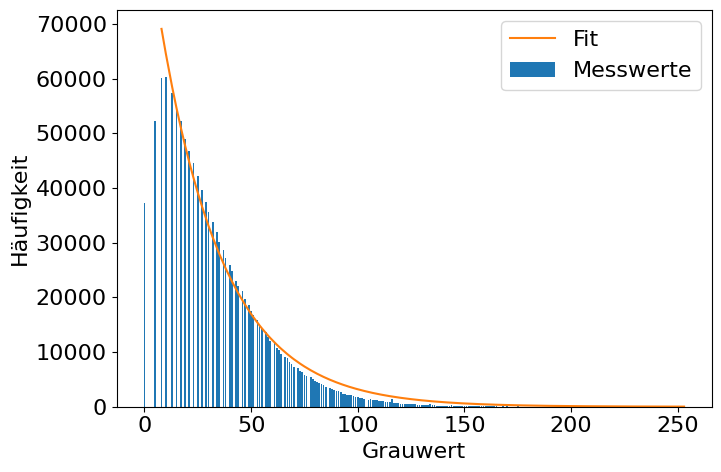

In [13]:
dark = np.array(Image.open('3.2/3.2.2/DarkFrame_gedreht.bmp'), dtype=int).reshape(camera_res)
speckle = np.array(Image.open('3.2/3.2.2/Specklemuster_01.bmp')).reshape(camera_res)
speckle = np.where(speckle > 0, speckle, 0)
greyscale_values, counts = np.unique(speckle, return_counts=True)
# counts = counts[counts != 0]
# greyscale_values = greyscale_values[counts != 0]
def exponential(x, a, b):
    return a * np.exp(-b*x) 
popt,pcov = curve_fit(exponential, greyscale_values[2:], counts[2:], p0=(7e4, 3e-2))
fig,ax = plt.subplots(figsize=(7.5,5))
#ax.plot(greyscale_values, counts, 'o', color=cmap[0], label='Messwerte')
ax.bar(greyscale_values, counts, color=cmap[0], label='Messwerte')
ax.plot(greyscale_values[2:], exponential(greyscale_values[2:], *popt), label='Fit', color=cmap[1])
ax.set_xlabel('Grauwert')
ax.set_ylabel('Häufigkeit')
ax.legend()
fig.tight_layout()
fig.savefig('Plots/speckle_histogram.pdf')
